# Γραμμική παλινδρόμηση & Δέντρα αποφάσεων

Θα συγκρίνουμε τις 2 μεθόδους μηχανικής μάθησης.

## Επανάληψη: Γραμμική παλινδρόμηση 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Φτιάχνουμε τυχαία x-data
x = np.arange(0, 50, 0.2) 
print(x)

[ 0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6
  2.8  3.   3.2  3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8  5.   5.2  5.4
  5.6  5.8  6.   6.2  6.4  6.6  6.8  7.   7.2  7.4  7.6  7.8  8.   8.2
  8.4  8.6  8.8  9.   9.2  9.4  9.6  9.8 10.  10.2 10.4 10.6 10.8 11.
 11.2 11.4 11.6 11.8 12.  12.2 12.4 12.6 12.8 13.  13.2 13.4 13.6 13.8
 14.  14.2 14.4 14.6 14.8 15.  15.2 15.4 15.6 15.8 16.  16.2 16.4 16.6
 16.8 17.  17.2 17.4 17.6 17.8 18.  18.2 18.4 18.6 18.8 19.  19.2 19.4
 19.6 19.8 20.  20.2 20.4 20.6 20.8 21.  21.2 21.4 21.6 21.8 22.  22.2
 22.4 22.6 22.8 23.  23.2 23.4 23.6 23.8 24.  24.2 24.4 24.6 24.8 25.
 25.2 25.4 25.6 25.8 26.  26.2 26.4 26.6 26.8 27.  27.2 27.4 27.6 27.8
 28.  28.2 28.4 28.6 28.8 29.  29.2 29.4 29.6 29.8 30.  30.2 30.4 30.6
 30.8 31.  31.2 31.4 31.6 31.8 32.  32.2 32.4 32.6 32.8 33.  33.2 33.4
 33.6 33.8 34.  34.2 34.4 34.6 34.8 35.  35.2 35.4 35.6 35.8 36.  36.2
 36.4 36.6 36.8 37.  37.2 37.4 37.6 37.8 38.  38.2 38.4 38.6 38.8 39.
 39.2 39.

In [3]:
# τα y-data ακολουθούν μια συνάρτηση ημίτονο (προτείνω να μην μπούμε σε λεπτομέρειες, απλά θέλω να δούμε το γράφημα)
y = np.sin(x) 
y = np.round(y, 2)
print(y)

[ 0.    0.2   0.39  0.56  0.72  0.84  0.93  0.99  1.    0.97  0.91  0.81
  0.68  0.52  0.33  0.14 -0.06 -0.26 -0.44 -0.61 -0.76 -0.87 -0.95 -0.99
 -1.   -0.96 -0.88 -0.77 -0.63 -0.46 -0.28 -0.08  0.12  0.31  0.49  0.66
  0.79  0.9   0.97  1.    0.99  0.94  0.85  0.73  0.58  0.41  0.22  0.02
 -0.17 -0.37 -0.54 -0.7  -0.83 -0.92 -0.98 -1.   -0.98 -0.92 -0.82 -0.69
 -0.54 -0.36 -0.17  0.03  0.23  0.42  0.59  0.74  0.86  0.94  0.99  1.
  0.97  0.89  0.79  0.65  0.49  0.3   0.11 -0.09 -0.29 -0.47 -0.64 -0.78
 -0.89 -0.96 -1.   -0.99 -0.95 -0.87 -0.75 -0.6  -0.43 -0.25 -0.05  0.15
  0.34  0.52  0.68  0.81  0.91  0.98  1.    0.98  0.93  0.84  0.71  0.56
  0.38  0.19 -0.01 -0.21 -0.4  -0.57 -0.72 -0.85 -0.94 -0.99 -1.   -0.97
 -0.91 -0.8  -0.67 -0.51 -0.33 -0.13  0.07  0.26  0.45  0.62  0.76  0.88
  0.95  0.99  1.    0.96  0.88  0.77  0.62  0.46  0.27  0.07 -0.13 -0.32
 -0.5  -0.66 -0.8  -0.9  -0.97 -1.   -0.99 -0.94 -0.85 -0.73 -0.58 -0.4
 -0.21 -0.02  0.18  0.37  0.55  0.71  0.83  0.93  0.98

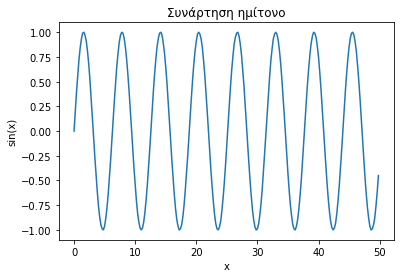

In [4]:
# φτιάχνουμε τη γραφική παράσταση
plt.plot(x, y) 
# προσθέτουμε τα axis labels και τον τίτλο plot
plt.xlabel('x')     
plt.ylabel('sin(x)')
plt.title('Συνάρτηση ημίτονο')
# Show the final plot
plt.show()

In [5]:
# Να θυμάστε ότι χρησιμοποιούμε ndarrays ως είσοδο στα μοντέλα μας
type(y) 

numpy.ndarray

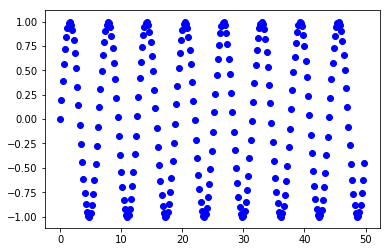

In [6]:
# Στο προηγούμενο γράφημα τα σημεία ενώνονταν με γραμμές, αυτό είναι όμως πιο ρεαλιστικό. 
plt.scatter(x, y, color='b', marker='o')
# Δείχνει το τελικό γράφημα
plt.show()

In [7]:
# Κάνουμε Reshape σε 1D (1 διάσταση)
x = x.reshape(-1,1)
# Κάνουμε Reshape σε 1D 
y = y.reshape(-1,1)

## Επανάληψη: Κάνουμε fit το linear regression model

In [8]:
lin_reg = LinearRegression()
# εκπαίδευση 
lin_reg.fit(x, y)
# Φτιάχνει τις προβλέψεις με το training data-set
y_pred = lin_reg.predict(x)
# υπολογισμός MSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
# υπολογισμός R squared
r2 = round(lin_reg.score(x, y),2)  
# Coefficients 
b = lin_reg.coef_
# Intercept
d = lin_reg.intercept_
# Γράφουμε σε κείμενο τα λάθη
txt = "R2 = {} \nRMSE = {} \ncoef = {} \nintercept = {}"
# και τα τυπώνουμε
print(txt.format(r2, rmse, b, d))

R2 = 0.01 
RMSE = 0.7056537591727323 
coef = [[-0.00465604]] 
intercept = [0.1170553]


### Αποτελέσματα του μοντέλου, πόσο καλά τα πήγε?

Πώς περιμένετε ότι θα είναι η γραμμή? και πόσο καλά εξηγεί τα δεδομένα?

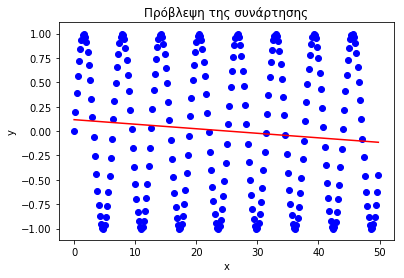

In [10]:
s1 = plt.scatter(x, y, color='b', marker='o')

plt.xlabel('x')

plt.ylabel('y')

plt.title('Πρόβλεψη της συνάρτησης')
# προσθέτουμε τη γραμμή

plt.plot(x, y_pred, color='red')

plt.show()

Όπως βλέπουμε η γραμμική παλινδρόμηση δεν μπορεί να πιάσει την συγκεκριμένη δομή δεδομένων. 


Πάμε λοιπόν να δοκιμάσουμε μη γραμμικά μοντέλα:

## Δέντρα αποφάσεων


In [11]:
# Εισάγουμε τον regressor από το scikit-learn
from sklearn.tree import DecisionTreeRegressor

In [12]:
# φτιάχνουμε πάλι τα testing data
x = np.arange(0, 50, 0.2) 
y = np.sin(x)
y = np.round(y, 2)
x_test = np.arange(0, 50, 0.3)

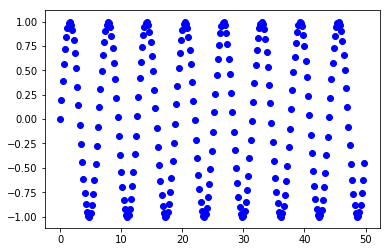

In [13]:
plt.scatter(x, y, color='b', marker='o')

plt.show()

In [14]:
# Reshape σε 1D
x = x.reshape(-1,1)

y = y.reshape(-1,1)

x_test = x_test.reshape(-1,1)

In [15]:
# Κάνουμε fit το tree regression model
# Σημείωση: το max_depth parameter λέει στο δέντρο μέχρι τι βάθος επιτρέπεται να φτάσει
regr_1 = DecisionTreeRegressor(max_depth=5)
# Όσο πιο μεγάλο βάθος τόσο πιο περίπλοκο! Θυμάστε ότι τα μεγάλα δέντρα μπορεί να κάνουν overfit
regr_2 = DecisionTreeRegressor(max_depth=20)
# Κάνουμε fit το tree στα data
regr_1.fit(x, y)
# Κάνουμε fit το tree στα data
regr_2.fit(x, y)

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [16]:
# Κάνει προβλέψεις
y_1 = regr_1.predict(x_test)
y_2 = regr_2.predict(x_test)
# Κάντε print τα y_1 & y_2 για να δείτε τις τιμές των προβλέψεων


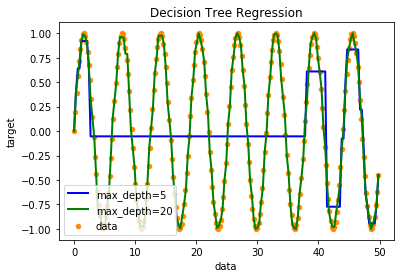

In [17]:
# Οπτικοποίηση των αποτελεσμάτων y_1 & y_2
plt.figure()
plt.scatter(x, y, s=20, edgecolor="darkorange",
            c="darkorange", label="data")
plt.plot(x_test, y_1, color="b", label="max_depth=5", linewidth=2)
plt.plot(x_test, y_2, color="g", label="max_depth=20", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

Βλέπουμε λοιπόν ότι με τα decision trees μπορούμε να πιάσουμε το pattern της συνάρτησης ημιτόνιου αρκετά καλά ότα επιτρέπουμε ένα μεγάλο δέντρο. Τώρα θα δούμε πώς το μεγάλο βάθος μπορεί να προκαλέσει πρόβλημα.

Οπότε θα μετατρέψουμε τα δεδομένα μας λίγο ώστε να ταιριάζουν καλύτερα σε δέντρα με διαφορετικά βάθη. 

In [18]:
# Νέα data
# x data
x = np.arange(0, 20, 0.1) 
# y data
y = np.cos(x)
# Ξεκινά το random number generator με state 1
rng = np.random.RandomState(1)
# Βάζουμε λίγο θόρυβο για να δυσκολέψουμε το fitting
# x data
x_test = np.arange(0, 20, 0.18)
# y data
y[::5] += 3 * (0.5 - rng.rand(40)) 
# Reshape σε 1D
x = x.reshape(-1,1)
# Reshape σε 1D
y = y.reshape(-1,1)
# Reshape σε 1D
x_test = x_test.reshape(-1,1)

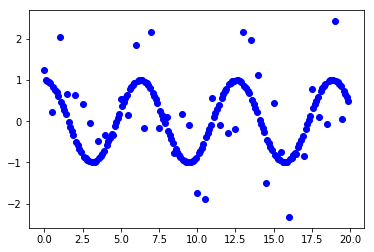

In [19]:
plt.scatter(x, y, color='b', marker='o')

plt.show()

In [20]:
regr_1 = DecisionTreeRegressor(max_depth=2)
# Το μεγαλύτερο βάθος οδηγεί σε overfit!
regr_2 = DecisionTreeRegressor(max_depth=20) 

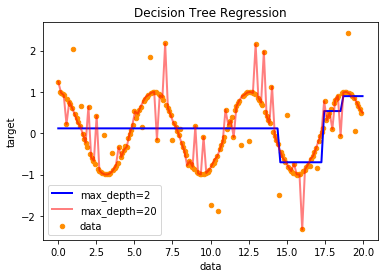

In [21]:
# Fit τα tree regression models
regr_1.fit(x, y)
regr_2.fit(x, y)
# προβλέψεις
y_1 = regr_1.predict(x_test)
y_2 = regr_2.predict(x_test)
# οπτικοποίηση αποτελεσμάτων
plt.figure()
plt.scatter(x, y, s=20, edgecolor="darkorange",
            c="darkorange", label="data")
plt.plot(x_test, y_1, color="b", label="max_depth=2", linewidth=2)
plt.plot(x_test, y_2, color="r", label="max_depth=20", linewidth=2, alpha=0.5)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
# τελικό plot
plt.show()

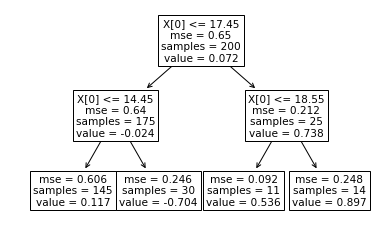

In [22]:
# Μπορούμε να οπτικοποιήσουμε το δέντρο

from sklearn.tree import plot_tree

plot_tree(regr_1)

plt.show()

Είδαμε ότι το βάθος των δέντρων επηρεάζει δραστικά την απόδοση. Βέβαια όταν υπάρχουν ακραία στοιχεία δεν είναι καλό το δέντρο να εκπαιδεύεται πολύ καλά σε αυτά, καθώς μετά κάνει overfit. Επίσης, είδαμε ότι αν περιορίσουμε το δέντρο μας πολύ τότε πάλι δεν έχουμε καλές προβλέψεις. Η διαδικασία με την οποία προσπαθούμε να φτιάξουμε το τέλειο μοντέλο λέγεται hyperparameter optimization. Αυτό θα το δούμε στα επόμενα μαθήματα. 

### 2. Πάμε να χρησιμοποιήσουμε ξανά τα Bostοn housing data, αλλά αυτή τη φορά με δέντρα αποφάσεων. 

In [23]:
from sklearn import datasets

boston_set = datasets.load_boston()  

In [24]:
print(boston_set.DESCR) 

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [25]:
print(boston_set.keys())
print(boston_set.data.shape) 

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)


In [26]:
# Βάζουμε τα data σε DataFrame
boston_df = pd.DataFrame(boston_set.data, columns=boston_set.feature_names)
# προσθέτουμε το target στο DataFrame
boston_df['PRICE'] = pd.Series(boston_set.target)

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [27]:
# Μετατρέπουμε τα δεδομένα του df σε ndarray
# Μετατρέπουμε την στήλη που μας ενδιαφέρει π.χ. το RM 
x_try = np.array(boston_df.RM)
# target
y_try = np.array(boston_df.PRICE)
# Reshape σε 1D
x_try = x_try.reshape(-1,1)
# Reshape σε 1D
y_try = y_try.reshape(-1,1)
# Print το data shape
print(x_try.shape)
print(y_try.shape)

(506, 1)
(506, 1)


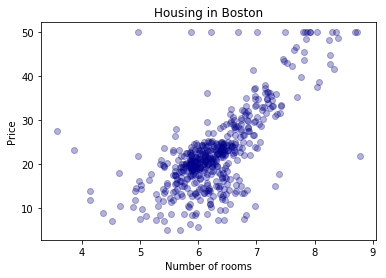

In [28]:
# Οπτικοποίηση με scatter plot
s1 = plt.scatter(x_try, y_try, color='darkblue', marker='o', alpha = 0.3)
# labels
plt.xlabel('Number of rooms')  # Set xlabel
plt.ylabel('Price') # Set ylabel
# title
plt.title('Housing in Boston') # Set title
# final plot
plt.show()

In [29]:
# Decision Tree με max depth 2
regr_tree = DecisionTreeRegressor(max_depth=2) 

In [30]:
# Fit το decision tree model
regr_tree.fit(x_try, y_try)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [31]:
# predictions
y_pred = regr_tree.predict(x_try)
# Print predictions
print(y_pred)

[25.49558824 18.88895028 32.11304348 32.11304348 32.11304348 18.88895028
 18.88895028 18.88895028 18.88895028 18.88895028 18.88895028 18.88895028
 18.88895028 18.88895028 18.88895028 18.88895028 18.88895028 18.88895028
 18.88895028 18.88895028 18.88895028 18.88895028 18.88895028 18.88895028
 18.88895028 18.88895028 18.88895028 18.88895028 18.88895028 25.49558824
 18.88895028 18.88895028 18.88895028 18.88895028 18.88895028 18.88895028
 18.88895028 18.88895028 18.88895028 25.49558824 32.11304348 25.49558824
 18.88895028 18.88895028 18.88895028 18.88895028 18.88895028 18.88895028
 18.88895028 18.88895028 18.88895028 18.88895028 18.88895028 18.88895028
 18.88895028 32.11304348 18.88895028 25.49558824 18.88895028 18.88895028
 18.88895028 18.88895028 18.88895028 25.49558824 32.11304348 18.88895028
 18.88895028 18.88895028 18.88895028 18.88895028 18.88895028 18.88895028
 18.88895028 18.88895028 18.88895028 18.88895028 18.88895028 18.88895028
 18.88895028 18.88895028 25.49558824 25.49558824 18

In [33]:
# λάθος MSE
rmse = np.sqrt(mean_squared_error(y_try, y_pred))
# λάθος R squared
r2 = round(regr_tree.score(x_try, y_try),2)  

txt_one_feature = "R2 = {} \nRMSE = {}"


print(txt_one_feature.format(r2, rmse))

R2 = 0.58 
RMSE = 5.933942413398048


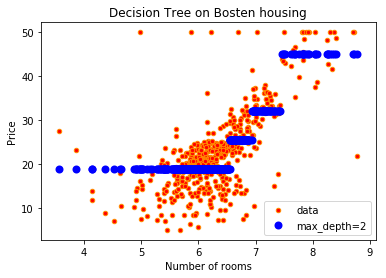

In [34]:
# Οπτικοποίηση αποτελεσμάτων 
plt.figure()
plt.scatter(x_try, y_try, s=20, edgecolor="darkorange",
            c="r", label="data")
plt.scatter(x_try, y_pred, color="b", label="max_depth=2", linewidth=2)
plt.xlabel("Number of rooms")
plt.ylabel("Price")
plt.title("Decision Tree on Bosten housing")
plt.legend()
#final plot
plt.show()

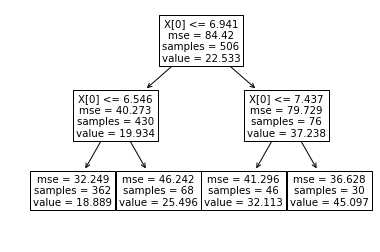

In [35]:
#tree plot
plot_tree(regr_tree)

plt.show()

Δοκιμάστε διαφορετικό βάθος δέντρων για να βρείτε διαφορές. 
Γενικά παρατηρούμε ότι με το decision tree παίρνουμε κοντινά αποτελέσματα όπως και στο γραμμικό μοντέλο αλλά εξηγεί μεγαλύτερο variance σε σχέση με το γραμμικό μοντέλο, (εκπαίδευση στα ίδια δεδομένα με την ίδια στήλη πήραμε R² = 0.58)

## Προσθέτουμε παραπάνω features



In [36]:
# Στο X_try όλα τα features εκτός αυτού που θέλουμε να προβλέψουμε
X_try = boston_df.drop('PRICE', axis = 1) 

y_try = boston_df['PRICE']    

In [37]:
X_try.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [38]:
regr_tree = DecisionTreeRegressor(max_depth=2) 

In [39]:
# Fit το decision tree regression model
regr_tree.fit(X_try, y_try)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [40]:
# προβλέψεις
y_pred = regr_tree.predict(X_try)

In [41]:
# λάθος MSE
rmse = np.sqrt(mean_squared_error(y_try, y_pred))
# λάθος R squared
r2 = round(regr_tree.score(X_try, y_try),2)  

txt_all_features = "R2 = {} \nRMSE = {}"

print(txt_all_features.format(r2, rmse))

R2 = 0.7 
RMSE = 5.069464217461848


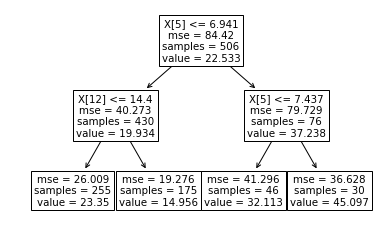

In [42]:
#tree plot
plot_tree(regr_tree)

plt.show()

## Συζήτηση

Όταν βάλαμε τα υπόλοιπα features βελτιώνονται οι προβλέψεις (χρησιμοποιώντας το ίδιο βάθος). Επίσης, όσο μεγαλώνουμε το βάθος τα δεδομένα κάνουν καλύτερο fit και πλησιάζουμε πιο κοντά στο ιδανικό R² = 1.
Παρόλα αυτά αυτό που συμβαίνει μέχρι τώρα είναι ότι κάνουμε overfit τα data. Υποθέτοντας ότι εκπαιδεύσαμε το μοντέλο με ΟΛΑ τα δεδομένα, όταν ένα νέο σπίτι βγει στην πώληση, το μοντέλο μας δεν θα καταφέρει να προβλέψει σωστά εφόσον δεν έχει ξαναδεί το συγκεκριμένο σπίτι.

Υπάρχουν φυσικά τρόποι να  κάνουμε το μοντέλο μας  γενικεύσιμο και αυτό θα το μάθουμε στο μάθημα. 